## Slope of Regression with Outliers

Start by running the starter code (outliers/outlier_removal_regression.py) and visualizing the points. A few outliers should clearly pop out.

C:\Users\parthi2929\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


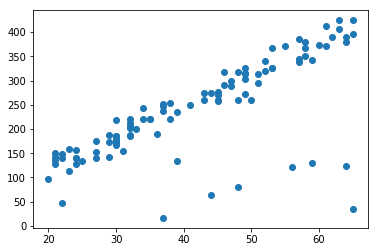

your regression object doesn't exist, or isn't name reg
can't make predictions to use in identifying outliers


In [1]:
#!/usr/bin/python

%matplotlib inline
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )


### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like



try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"




**Deploy regression**

Deploy a linear regression, where net worth is the target and the feature being used to predict it is a person’s age (remember to train on the training data!).

**Input/feature:** person's age  
**target:** net worth

[[5.07793064]]
[25.21002155]


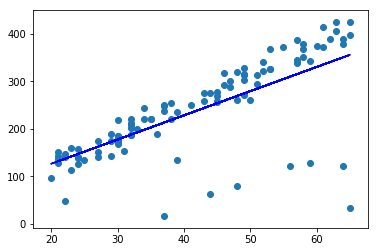

In [2]:
#!/usr/bin/python

%matplotlib inline
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )


### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (ages_train,net_worths_train)
print reg.coef_
print reg.intercept_


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"




**Score of Regression with Outliers**

What is the score you get when using your regression to make predictions with the test data?

In [3]:
from sklearn.metrics import r2_score

# predicting the 'bonus' from 'TEST inputs/salaries'
target_predictions = reg.predict(ages_test)

# comparing predicted 'bonus' with 'TEST' bonus
score = r2_score(net_worths_test, target_predictions)  
score

0.8782624703664675

**Slope After Cleaning**

_outlier_cleaner.py:_
```python
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here

    
    return cleaned_data
```

There should be 90 elements in each of these lists (because the training set has 90 points in it).   

Your job is to return a list called cleaned_data that has only 81 elements in it, which are the 81 training points where the predictions and the actual values (net_worths) have the smallest errors (90 * 0.9 = 81) or 90% of 90 elements is 81 elements.  

The format of cleaned_data should be a list of tuples, where each tuple has the form (age, net_worth, error).  

__Idea:__  

if $ \displaystyle Y$ is actual, $ \displaystyle \hat{Y}$ is prediction then,  
error $ \displaystyle e={{(Y-\hat{Y})}^{2}}$

1. I could first create raw list with errors (age, net_worth, error)
2. Sort them by error (ascending)
3. Return only first 81 elements (or 90% of length of incoming set)

In [4]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    #print 'I came here'
    
    ### your code goes here
    # raw
    for i in range(len(predictions)):
        error = (predictions[i] - net_worths[i])**2        
        cleaned_data.append((ages[i],net_worths[i], error))
    
    # sort by error
    cleaned_data.sort(key=lambda x:x[2])
    
    # return only 1st 10%
    return cleaned_data[:80]


Checking it in code.. 

[[5.07793064]]
[25.21002155]


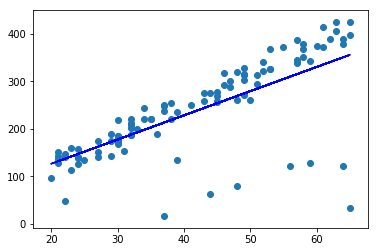

[[6.32006691]]
[-5.32173018]


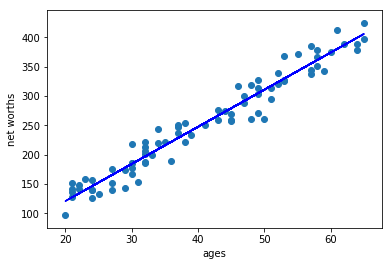

In [5]:
#!/usr/bin/python

%matplotlib inline
import random
import numpy
import matplotlib.pyplot as plt
import pickle

#from outlier_cleaner import outlierCleaner

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )


### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (ages_train,net_worths_train)
print reg.coef_
print reg.intercept_


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"
    
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
        print reg.coef_
        print reg.intercept_
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

**New score**

What’s the new score when you use the regression to make predictions on the test set?

In [6]:
from sklearn.metrics import r2_score

# predicting the 'bonus' from 'TEST inputs/long term incentives'
target_predictions = reg.predict(ages_test)

# comparing predicted 'bonus' with 'TEST' bonus
score = r2_score(net_worths_test, target_predictions)  
score

0.9824700510044745

## Enron Outliers

In [7]:
#skeleton from enron_outliers.py

import pickle
import sys
import matplotlib.pyplot
#sys.path.append("../tools/") # having it in same folder now
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../17. Final Project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

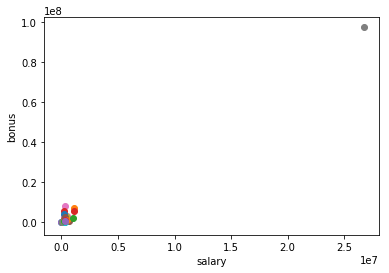

In [8]:
### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

**Identify the Biggest Enron Outlier**  

There’s one outlier that should pop out to you immediately. Now the question is to identify the source. We found the original data source to be very helpful for this identification; you can find that PDF in 17. Final Project/enron61702insiderpay.pdf 
What’s the name of the dictionary key of this data point? (e.g. if this is Ken Lay, the answer would be “LAY KENNETH L”).

**Idea:**
1. Take the max of bonus, find its corresponding recipient

In [9]:
# get data. 
features = ["bonus", "salary"]  # bonus is the target, salary is the feature/input
data_array = featureFormat( data_dict, features )
bonuses_train, salaries_train = targetFeatureSplit(data_array)
maxxy = max(bonuses_train)

# scroll through dataset, whoever has salary and bonus as first_outlier is the culprit
for k,v in data_dict.iteritems():
    if v['bonus'] == maxxy:
        print k

TOTAL


Ha ha.. This was funny.. Its total. 

**Note:** We did not train because, the error would not have maxed out showing this as an outlier. Check this plot. Obviously due to regression line close to outlier, error calculated would be lesser, and would not have come out as max (It didn't., I tried!). Probably you could experiment with splitting into test data (randomly as we woudd not know this outlier upfront), and see outlier's error maxes out..Probably I am missing something.

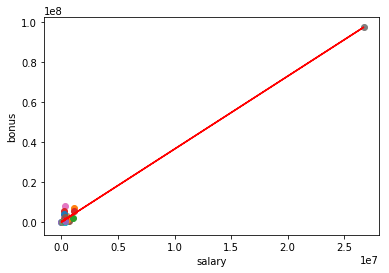

In [10]:
## train and calculate regression, predict 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (salaries_train,bonuses_train) # yeah using all train data
bonus_predictions = reg.predict(salaries_train) 

### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

# plot regression also
matplotlib.pyplot.plot(salaries_train, bonus_predictions, color='r')
    
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

## Any More Outliers?

A quick way to remove a key-value pair from a dictionary is the following line: dictionary.pop( key, 0 ) Write a line like this (you’ll have to modify the dictionary and key names, of course) and remove the outlier before calling featureFormat(). Now rerun the code, so your scatterplot doesn’t have this outlier anymore. Are all the outliers gone?

In [11]:
# remove 'TOTAL' outlier
data_dict.pop('TOTAL',0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [12]:
#skeleton from enron_outliers.py
import pickle
import sys
import matplotlib.pyplot
#sys.path.append("../tools/") # having it in same folder now
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
#data_dict = pickle.load( open("../17. Final Project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

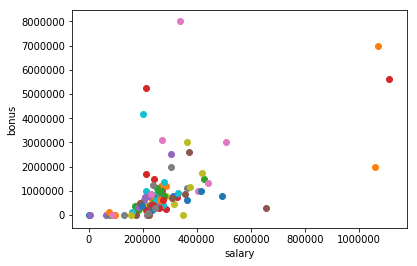

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    ax.scatter( salary, bonus )

ax.set_xlabel("salary")
ax.set_ylabel("bonus")
plt.show()

**Identifying Two More Outliers**

We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits. What are the names associated with those points?

In [14]:
for k,v in data_dict.iteritems():
    if v['salary'] != 'NaN' and v['bonus'] != 'NaN': #not doing this was causing headache!
        if v['salary'] > 1000000 and v['bonus'] > 5000000:
            print k

LAY KENNETH L
SKILLING JEFFREY K
